
# This notebook is based the python module **Diffractio** 
### see  https://diffractio.readthedocs.io/en/latest/ and https://bitbucket.org/optbrea/diffractio/src/master/docs/readme.rst?mode=view

by Luis Miguel Sanchez Brea <optbrea@ucm.es>

Universidad Complutense de Madrid, Faculty of Physical Sciences, Department of Optics Plaza de las ciencias 1, ES-28040 Madrid (Spain)

# The notebook uses Diffractio as a design tool for diffraction gratings for Grating magneto-optical traps GMOTS see:- http://dx.doi.org/10.1038/Nnano.2013.47


Author 
Charlie Ironside
Department of Physics and Astronomy,
Curtin University
https://staffportal.curtin.edu.au/staff/profile/view/Charlie.Ironside/

Charlie.ironside@curtin.edu.au

Sept 2020.


Edited by Xiao Sun
xiao.sun@uwa.edu.au
Curtin University
Oct. 2020


It is written on Google's Colab platform
https://colab.research.google.com/notebooks/intro.ipynb#recent=true



The first part installs the Diffractio package and additonal packages as described in :- https://diffractio.readthedocs.io/en/latest/installation.html

In [ ]:
!pip install hickle
!pip install mayavi
!pip install py-pol
!pip install diffractio

     |████████████████████████████████| 51kB 1.5MB/s 
     |████████████████████████████████| 7.1MB 2.6MB/s 
     |████████████████████████████████| 307kB 38.1MB/s 
     |████████████████████████████████| 522kB 23.1MB/s 
     |████████████████████████████████| 5.4MB 22.9MB/s 
     |████████████████████████████████| 573kB 33.4MB/s 
     |████████████████████████████████| 5.2MB 36.7MB/s 
     |████████████████████████████████| 103.4MB 48kB/s 
  ERROR: Failed building wheel for mayavi
  Running setup.py clean for mayavi
  Created wheel for apptools: filename=apptools-4.5.0-cp36-none-any.whl size=396527 sha256=0903ca03f43a070bbaf3bde92b32ab4663d7ef52f89d88cce72b46af5955eb21
  Stored in directory: /root/.cache/pip/wheels/c2/bf/9c/3037e3c4bbd95652aa5844086ecf812f83501ba9e00a4779d8
  Created wheel for envisage: filename=envisage-4.9.2-cp36-none-any.whl size=337247 sha256=ca776bda0d691c7590cb8c804d0aeb72bb6d1bf84db99bc1014c198be6c11078
  Stored in directory: /root/.cache/pip/wheels/a0/79/83/04

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from diffractio import um, nm, mm, np,degrees, plt, sp
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw_several_fields
from scipy.fftpack import fft, fftshift, ifft

Good result: factor 2.06


(-100.0, 100.0)

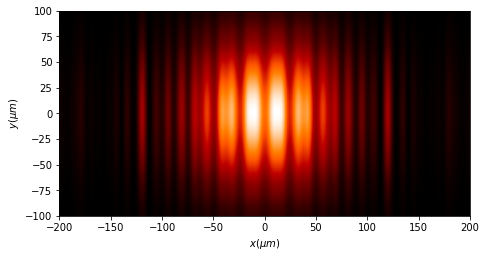

In [ ]:
################### Binary grating ###################
################### 2D propagation ###################


num_pixels = 1024

length = 1000 * um

x0 = np.linspace(-length/2, length/2, num_pixels)
y0 = np.linspace(-length/2, length/2, num_pixels)
z0 = np.linspace(-length/2, length/2, num_pixels)

wavelength = 0.399 * um
period = 0.62 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=0 * um, w0=60 * um, theta=0* degrees) ## w0: waist radius, beam size
#u0.draw(kind='field', filename='x_source.png')   ## draw source at X

u0_plane = Scalar_source_X(x=x0, wavelength=wavelength)
u0_plane.plane_wave(theta=1 * degrees, z0=0 * um)

#######################################################
        # """Plane wave. self.u = A * exp(1.j * k * (self.x * sin(theta) + z0 * cos(theta)))

        # Parameters:
        #     A (float): maximum amplitude
        #     theta (float): angle in radians
        #     z0 (float): constant value for phase shift
        # """
#######################################################

fill_factor=0.5 # width of ridge / period

####################### XZ plane #######################################################

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1) ## 2D grating
t1.incident_field(u0_plane)
t1.ronchi_grating(
    period = period,
    fill_factor=fill_factor, 
    length=length, ## grating range
    height=wavelength/4, ## height of ridges
    r0=(0 * um, 0 * um), ## centre position。
    Dx=0* um,
    refraction_index=3.5, ## silicon
    heigth_substrate=0 * um, ## thickness of substrate
    refraction_index_substrate=3.5,
    angle=0 * degrees)
# t1.draw_refraction_index(filename='grating.png'); ## draw refraction index distribution

# t1_out=u0 * t1

t1.BPM()
# t1.draw(logarithm=False, normalize='maximum', draw_borders=True,colorbar_kind='vertical',filename='Optical_Diff.png')


####################### XY plane #######################################################
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0,0), w0=(100* um, 100* um),theta=0 * degrees, phi=0 * degrees)
#u1.draw(kind='field', filename='x_source.png')  ## draw source at XY plan

u1_plane = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1_plane.plane_wave(A=1, theta=0.0, phi=0.0, z0=0.0)

#######################################################
        # Parameters:
        #     r0 (float, float): (x,y) position of center
        #     w0 (float, float): (wx,wy) minimum beam width
        #     z0 (float): position of beam width
        #     A (float): maximum amplitude
        #     theta (float): angle in radians (direction of propagation)
        #     phi (float): angle in radians (direction of propagation)
#######################################################

t2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength) ## 2D grating
# t2.incident_field(u1)
t2.binary_grating(
    period = period,
    amin=0,
    amax=wavelength/4,
    phase=0* degrees,
    x0=0* um,
    fill_factor=fill_factor,
    angle=0 * degrees)
# t2.draw(kind='intensity',filename='x_out_'+str(fill_factor)+'.png'); ## draw refraction index distribution

t2_out = u1 * t2

t2_out1 = t2_out.RS(z=5000* um, new_field=True, verbose=True) # intensity at z= * um, detector position
t2_out1.draw(kind='intensity',filename='xy_out_'+str(fill_factor)+'.png')
plt.xlim(-200,200)
plt.ylim(-100, 100)

#######################################################
# RS(z, amplification=(1, 1), n=1, new_field=True, matrix=False, kind='z', verbose=False)[source]
# Fast-Fourier-Transform method for numerical integration of diffraction Rayleigh-Sommerfeld formula. 
# Is we have a field of size N*M, the result of propagation is also a field N*M. Nevertheless, there is a parameter amplification which allows us to determine the field in greater observation planes (jN)x(jM).

# Parameters:	
# amplification (int, int) – number of frames in x and y direction
# z (float) – distance to observation plane. if z<0 inverse propagation is executed
# n (float) – refraction index
# new_field (bool) – if False the computation goes to self.u, if True a new instance is produced
# kind (str) –
# verbose (bool) – if True it writes to shell
#######################################################


#######################################################
# Draws XY field.

# Parameters:	
# kind (str) – type of drawing: ‘amplitude’, ‘intensity’, ‘phase’, ‘ ‘field’, ‘real_field’, ‘contour’
# logarithm (bool) – If True, intensity is scaled in logarithm
# normalize (str) – False, ‘maximum’, ‘area’, ‘intensity’
# title (str) – title for the drawing
# filename (str) – if not ‘’ stores drawing in file,
# cut_value (float) – if provided, maximum value to show
# has_colorbar (bool) – if True draws the colorbar
# reduce_matrix (str) – ‘standard’
#######################################################

# t2_fft = t2_out.fft(z=5000 *um, remove0=False, new_field=True, shift=True) # FFT at z= * um, detector position
# t2_fft.draw(kind='fft',logarithm=False, normalize=True)
# plt.xlim(-60000,60000)
# plt.ylim(bottom=0);

#######################################################
# Parameters:	
# z (float) – distance to the observation plane or focal of lens. If None the exit is in radians
# shift (bool) – if True, fftshift is performed
# remove0 (bool) – if True, central point is removed
# matrix (bool) – if True only matrix is returned. If False, returns Scalar_field_X
# new_field (bool) – if True returns Scalar_field_X, else it puts in self
# verbose (bool) – prints info
# Returns:	
# FFT of the input field
#######################################################

In [95]:
################### Binary grating ###################
################### 1D ###################





######### NO Refractive Index Defined! ############


# from diffractio import um, nm, mm, np,degrees
# from diffractio.scalar_sources_X import Scalar_source_X
# from diffractio.scalar_fields_X import Scalar_field_X
# from diffractio.scalar_masks_X import Scalar_mask_X
# from diffractio.scalar_fields_XZ import Scalar_field_XZ
# from diffractio.scalar_masks_XZ import Scalar_mask_XZ
# from diffractio.utils_drawing import draw_several_fields
# from diffractio.scalar_masks_XY import Scalar_mask_XY
# from diffractio.scalar_sources_XY import Scalar_source_XY
# from scipy.fftpack import fft, fftshift, ifft



# num_pixels = 1024

# length = 1000 * um

# x0 = np.linspace(-length/2, length/2, num_pixels)
# y0 = np.linspace(-length/2, length/2, num_pixels)
# z0 = np.linspace(-length/2, length/2, num_pixels)


# wavelength = 0.399 * um
# period = 0.62 * um
# fill_factor= 0.5  # width of ridge / period

# u0 = Scalar_source_X(x=x0, wavelength=wavelength)
# u0.gauss_beam(
#     A=1, x0=0 * um, z0=0 * um, w0=1000* um, theta=0* degrees) ## w0: waist radius, beam size

# u0.draw(kind='field', filename='x_source.png')  # draw source


# ####################### X-axis  #######################################################

# Grating_Binary = Scalar_mask_X(x=x0, wavelength=wavelength) ## 1D 
# Grating_Binary.incident_field(u0)
# Grating_Binary.binary_grating(
#     period=period,
#     amin=0,
#     amax=wavelength/4,
#     phase=0,
#     x0=0* um,
#     fill_factor=fill_factor)
# # Grating_Binary.draw('amplitude')

# # out=u0*Grating_Binary


# out_Distance = Grating_Binary.RS(z=5000* um, new_field=True, verbose=True)  # intensity at z= * um, detector position

# out_Distance.draw(kind='intensity',filename='x_out_'+str(fill_factor)+'.png')


# # out_fft = out.fft(z=5000 * um, remove0=False, new_field=True, shift=True) # FFT at z= * um, detector position
# # out_fft.draw(kind='fft',logarithm=False, normalize=True)
# # plt.xlim(-60000,60000)
# # plt.ylim(bottom=0);

# ##################### FFT ######################################
# # fft(z=None, shift=True, remove0=False, matrix=False, new_field=False, verbose=False)[source]
# # Far field diffraction pattern using Fast Fourier Transform (FFT).

# # Parameters:	
# # z (float) – distance to the observation plane or focal of lens. If None the exit is in radians
# # shift (bool) – if True, fftshift is performed
# # remove0 (bool) – if True, central point is removed
# # matrix (bool) – if True only matrix is returned. If False, returns Scalar_field_X
# # new_field (bool) – if True returns Scalar_field_X, else it puts in self
# # verbose (bool) – prints info
# ##################################################################



# #plt.ylim(0, 0.01)
# #plt.xlim(-1000*um, 1000*um)
# #plt.savefig('x_out_'+str(fill_factor)+'.png')


# #out_Distance.draw(kind='intensity',normalize='maximum')



Good result: factor 4.09
- Needs denser sampling: factor 0.35


(-500.0, 500.0)

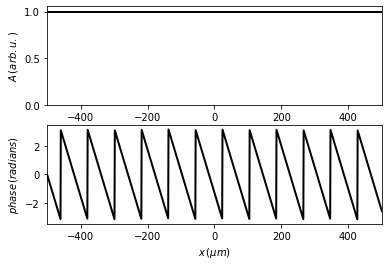

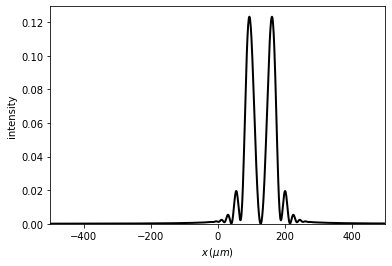

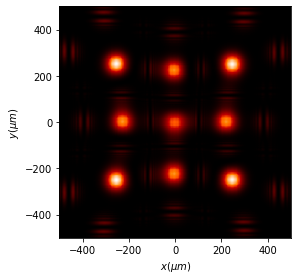

In [109]:
################### Blazed grating ###################
################### 1D ###################


import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

num_pixels = 1024

length = 1000 * um
height = 0.1 * um


x0 = np.linspace(-length/2, length/2, num_pixels)
y0 = np.linspace(-length/2, length/2, num_pixels)
z0 = np.linspace(-length/2, length/2, num_pixels)


wavelength = 0.399 * um
period = 0.62 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=0 * um, w0=60 * um, theta=40* degrees) ## w0: waist radius, beam size
# u0.draw(kind='field', filename='x_source.png')  # draw source

fill_factor=0.5


####################### X-axis  #######################################################

Grating_Blazed = Scalar_mask_X(x=x0, wavelength=wavelength) ## 1D 
Grating_Blazed.blazed_grating(
    period= period,
    height= height,
    n=3.5,
    x0=0 * um)
Grating_Blazed.draw(kind='field')

out=u0*Grating_Blazed


out_Distance = out.RS(z=5000 * um, new_field=True, verbose=True)  # intensity at z= * um, detector position
out_Distance.draw(kind='intensity',filename='x_out.png')


# out_fft = out.fft(z=5000 *um, remove0=False, new_field=True, shift=True) # FFT at z= * um, detector position

# out_fft.draw(kind='fft',logarithm=False, normalize=True)
# plt.xlim(-60000,60000)
# plt.ylim(bottom=0);


####################### XY Plane  #######################################################

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0,0), w0=(60* um, 60* um),theta=40 * degrees, phi=0 * degrees)

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)

t1.blazed_grating(
    period= period,
    height=height,
    index=3.5,
    x0=0 * um,
    angle=0* degrees)

# t1.draw('field') 


out = u1 * t1
out_Distance = out.RS(z=500 * um, new_field=True, verbose=True)  # intensity at z= * um, detector position
out_Distance.draw(kind='intensity',filename='xy_out.png')
region=1000 * um
plt.xlim(-region/2,region/2)
plt.ylim(-region/2, region/2)

